In [82]:
import nltk; nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sejan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
import pandas as pd
import numpy as np

In [84]:
# UB= pd.read_csv("D:\\Study\\Dr_Foulds\\Data_Mining\\Project\\urmita_train.csv")
# sj= pd.read_csv("D:\Study\Dr_Foulds\Data_Mining\Project\sejan_train.csv")
# sk= pd.read_csv("D:\Study\Dr_Foulds\Data_Mining\Project\sukrit_train.csv")
# ij= pd.read_csv("D:\Study\Dr_Foulds\Data_Mining\Project\indrojit_train.csv")

# data_claims = UB.append([sj, sk, ij])

# #I couldn't read json file for god knows what reason. So I had to read the previously split csv files and merge them together

In [102]:
data_claims = pd.read_json("D:\Study\Dr_Foulds\Data_Mining\Project\\train.jsonl", lines= True)

In [103]:
data_claims.head()

,claim,evidence,id,label,verifiable
0,Nikolaj Coster-Waldau worked with the Fox Broa...,"[[[92206, 104971, Nikolaj_Coster-Waldau, 7], [...",75397,SUPPORTS,VERIFIABLE
1,Roman Atwood is a content creator.,"[[[174271, 187498, Roman_Atwood, 1]], [[174271...",150448,SUPPORTS,VERIFIABLE
2,"History of art includes architecture, dance, s...","[[[255136, 254645, History_of_art, 2]]]",214861,SUPPORTS,VERIFIABLE
3,Adrienne Bailon is an accountant.,"[[[180804, 193183, Adrienne_Bailon, 0]]]",156709,REFUTES,VERIFIABLE
4,System of a Down briefly disbanded in limbo.,"[[[100277, None, None, None]]]",83235,NOT ENOUGH INFO,NOT VERIFIABLE


In [104]:
data_claims.isnull().values.any()

False

In [132]:
data_claims['evidence'][234]

[[[282986, 277116, 'Thor-COLON-_The_Dark_World', 0]],
 [[282986, 277117, 'Thor-COLON-_The_Dark_World', 1]],
 [[282986, 277118, 'Thor-COLON-_The_Dark_World', 2]],
 [[282986, 277119, 'Thor-COLON-_The_Dark_World', 9]],
 [[282986, 277120, 'Thor-COLON-_The_Dark_World', 17]],
 [[284882, 278627, 'Thor-COLON-_The_Dark_World', 0]],
 [[285686, 279323, 'Thor-COLON-_The_Dark_World', 0]],
 [[331430, 317966, 'Thor-COLON-_The_Dark_World', 0]],
 [[331433, 317969, 'Thor-COLON-_The_Dark_World', 0]],
 [[331433, 317970, 'Thor-COLON-_The_Dark_World', 1]],
 [[331433, 317971, 'Thor-COLON-_The_Dark_World', 2]],
 [[331433, 317972, 'Thor-COLON-_The_Dark_World', 15],
  [331433, 317972, 'Odeon_Leicester_Square', 0]],
 [[331433, 317973, 'Thor-COLON-_The_Dark_World', 16]],
 [[331433, 317974, 'Thor-COLON-_The_Dark_World', 17]]]

In [105]:
data_text_claims = data_claims[['claim']]
data_text_claims['index'] = data_text_claims.index
documents_claim = data_text_claims

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [106]:
print(len(documents_claim))
print(documents_claim[:5])

145449
                                               claim  index
0  Nikolaj Coster-Waldau worked with the Fox Broa...      0
1                 Roman Atwood is a content creator.      1
2  History of art includes architecture, dance, s...      2
3                  Adrienne Bailon is an accountant.      3
4       System of a Down briefly disbanded in limbo.      4


In [107]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sejan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [108]:
from nltk import PorterStemmer

In [109]:
def lemmatize_stemming(text):
    return PorterStemmer().stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [110]:
doc_sample = documents_claim[documents_claim['index'] == 0].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['Nikolaj', 'Coster-Waldau', 'worked', 'with', 'the', 'Fox', 'Broadcasting', 'Company.']


 tokenized and lemmatized document: 
['nikolaj', 'coster', 'waldau', 'work', 'broadcast', 'compani']


In [111]:
processed_docs_claims = documents_claim['claim'].map(preprocess)
processed_docs_claims[:10]

0    [nikolaj, coster, waldau, work, broadcast, com...
1                    [roman, atwood, content, creator]
2    [histori, includ, architectur, danc, sculptur,...
3                           [adrienn, bailon, account]
4                            [briefli, disband, limbo]
5    [homeland, american, televis, thriller, base, ...
6                   [beauti, reach, number, billboard]
7                                  [neal, schon, name]
8           [boston, celtic, play, home, game, garden]
9                                [command, epic, film]
Name: claim, dtype: object

In [112]:
dictionary_claims = gensim.corpora.Dictionary(processed_docs_claims)
count = 0
for k, v in dictionary_claims.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 broadcast
1 compani
2 coster
3 nikolaj
4 waldau
5 work
6 atwood
7 content
8 creator
9 roman
10 architectur


In [113]:
dictionary_claims.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)


In [114]:
bow_corpus_claims = [dictionary_claims.doc2bow(doc) for doc in processed_docs_claims]
bow_corpus_claims[4310]

[(411, 1), (664, 1), (1714, 1)]

In [115]:
bow_doc_4310 = bow_corpus_claims[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary_claims[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 411 ("polit") appears 1 time.
Word 664 ("phoenix") appears 1 time.
Word 1714 ("genghi") appears 1 time.


In [116]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus_claims)
corpus_tfidf = tfidf[bow_corpus_claims]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.3748751235065841),
 (1, 0.30104812118000485),
 (2, 0.4898438626691778),
 (3, 0.4898438626691778),
 (4, 0.4898438626691778),
 (5, 0.22135410799425279)]


In [118]:
lda_model = gensim.models.LdaMulticore(bow_corpus_claims, num_topics=40, id2word=dictionary_claims, passes=2, workers=2)

# This is for the Claims dataset topics


In [119]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.149*"state" + 0.131*"unit" + 0.057*"countri" + 0.038*"artist" + 0.031*"kingdom" + 0.028*"sell" + 0.023*"go" + 0.018*"break" + 0.016*"largest" + 0.015*"johnson"
Topic: 1 
Words: 0.070*"english" + 0.039*"multipl" + 0.034*"sport" + 0.028*"charl" + 0.026*"popular" + 0.022*"star" + 0.021*"cultur" + 0.017*"michael" + 0.017*"henri" + 0.016*"commun"
Topic: 2 
Words: 0.114*"record" + 0.072*"british" + 0.030*"sign" + 0.030*"success" + 0.026*"angel" + 0.023*"present" + 0.023*"wyatt" + 0.022*"nick" + 0.022*"earp" + 0.021*"australia"
Topic: 3 
Words: 0.063*"america" + 0.039*"profession" + 0.039*"team" + 0.038*"footbal" + 0.038*"player" + 0.034*"play" + 0.034*"north" + 0.031*"border" + 0.028*"marri" + 0.020*"leagu"
Topic: 4 
Words: 0.079*"die" + 0.068*"book" + 0.045*"comic" + 0.033*"famili" + 0.025*"bear" + 0.024*"brown" + 0.024*"christian" + 0.022*"januari" + 0.020*"attack" + 0.018*"titan"
Topic: 5 
Words: 0.055*"group" + 0.039*"univers" + 0.031*"indian" + 0.024*"write" + 0.023*"

# doc2vec implementation 


In [120]:
# from gensim.models.doc2vec import Doc2Vec

In [154]:
# model = Doc2Vec(documents_claim['claim'], dm=0, alpha= 0.025, size= 20, min_alpha= 0.025, min_count=0)

In [156]:
# sentences=models.doc2vec.TaggedLineDocument(data_claims['claim'])
# text_model=models.doc2vec.Doc2Vec(sentences, size=100, window=5, dm=1, dm_mean=1)
# text_input=text_model.docvecs.doctag_syn0

In [136]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [137]:
# df = pd.read_csv('Consumer_Complaints.csv')
df = data_claims[['claim','label']]
df = df[pd.notnull(df['claim'])]
# df.rename(columns = {'Consumer complaint narrative':'narrative'}, inplace = True)
df.head(10)

,claim,label
0,Nikolaj Coster-Waldau worked with the Fox Broa...,SUPPORTS
1,Roman Atwood is a content creator.,SUPPORTS
2,"History of art includes architecture, dance, s...",SUPPORTS
3,Adrienne Bailon is an accountant.,REFUTES
4,System of a Down briefly disbanded in limbo.,NOT ENOUGH INFO
5,Homeland is an American television spy thrille...,SUPPORTS
6,Beautiful reached number two on the Billboard ...,NOT ENOUGH INFO
7,Neal Schon was named in 1954.,NOT ENOUGH INFO
8,The Boston Celtics play their home games at TD...,SUPPORTS
9,The Ten Commandments is an epic film.,SUPPORTS


In [138]:
df.shape

(145449, 2)

In [140]:
df.index = range(145449)
df['claim'].apply(lambda x: len(x.split(' '))).sum()

1178450

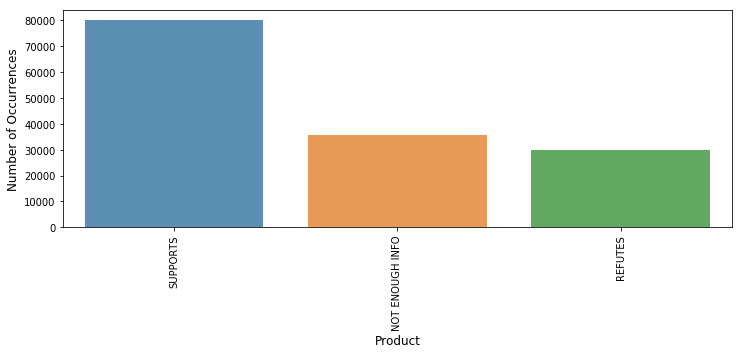

In [141]:
cnt_pro = df['label'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [142]:
def print_complaint(index):
    example = df[df.index == index][['claim', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('label:', example[1])
print_complaint(12)

There is a movie called The Hunger Games.
label: SUPPORTS


In [143]:
from bs4 import BeautifulSoup
def cleanText(text):
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text
df['claim'] = df['claim'].apply(cleanText)

In [144]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
import nltk
from nltk.corpus import stopwords
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['claim']), tags=[r.label]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['claim']), tags=[r.label]), axis=1)

In [145]:
train_tagged.values[30]

TaggedDocument(words=['the', '1996', 'draft', 'was', 'the', 'one', 'allen', 'iverson', 'was', 'in'], tags=['SUPPORTS'])

In [146]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [147]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|█████████████████████████████████████████████████████████████████████| 101814/101814 [00:00<00:00, 2828296.74it/s]


In [148]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha


100%|█████████████████████████████████████████████████████████████████████| 101814/101814 [00:00<00:00, 3182250.08it/s]


Wall time: 1min 17s


In [152]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, regressors

In [153]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Testing accuracy 0.572040792941446
Testing F1 score: 0.4938696236488339
